## Official Geotinder
---


## Improvments
1. Check for the last element of the photos_list and if is last then
- change text to DONE!!!
- change the image to the inital IMAGE
- disable both buttons
2. Check if the images folder exists
- mkdir
- display message the images folder is empty
3. Check if the images folder is empty
- display message the images folder is empty
4. Only read the jpgs out of the images folder 
5. Only keep the jpgs in the folder
### More Advanced Improvements
1. Force the image to fix in the box

In [75]:

import glob
  
list_ = glob.glob(r"root/home/project/code/database_models/*.py")
  
print(list_)

[]


Row(height=300, sizing_mode='fixed', width=655)
    [0] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='danger', margin=(120, 20), name='NO', width=50)
    [1] Column(align='center', margin=(0, 5), sizing_mode='fixed')
        [0] StaticText(margin=(0, 10))
        [1] JPG(str, height=250, sizing_mode='fixed', width=250)
    [2] Column(height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='success', margin=(120, 20), name='YES', width=50)
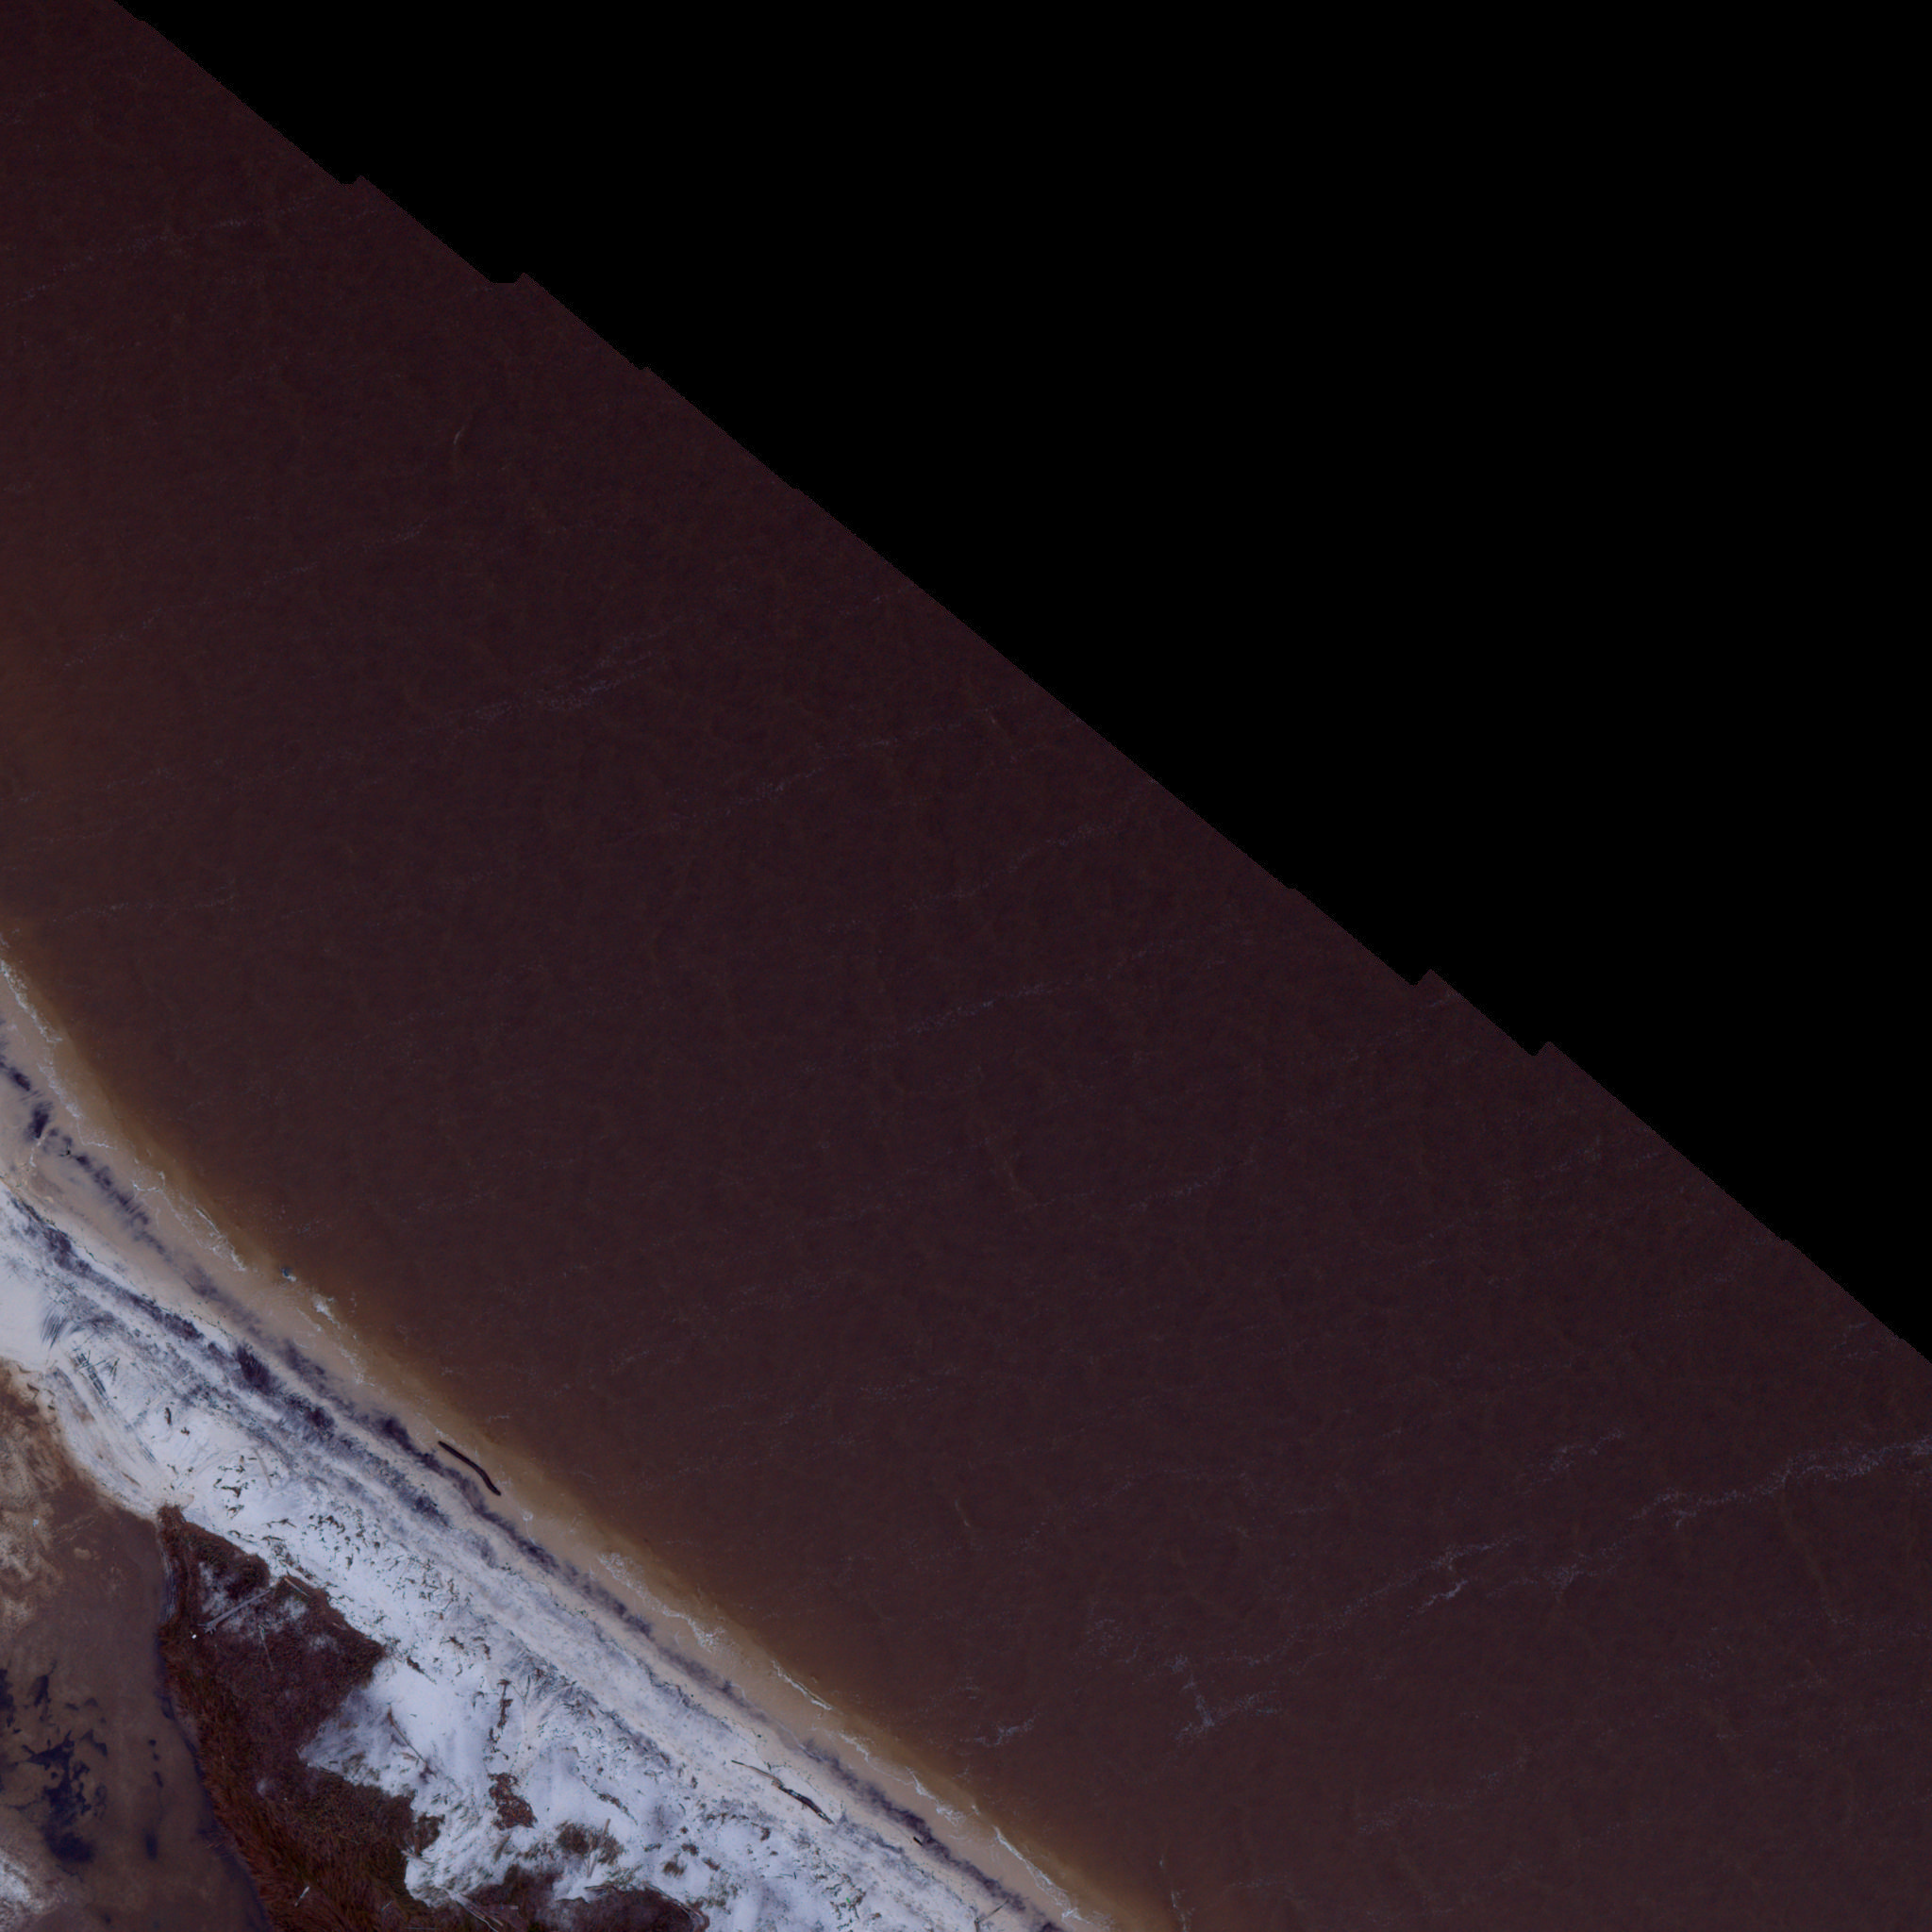

In [73]:
import shutil
import panel as pn
import param
import asyncio
import os
import asyncio
pn.extension()

def copy_image(photo_loc:str, ext:str):
        """COPY photo_loc to the sorted_images directory with the ext appended to the filename"""
        
        # Check if the sorted dir exists if it doesn't create it
        sorted_images_path=os.getcwd()+os.sep+"sorted_images"
        if not os.path.isdir(sorted_images_path):
            os.mkdir(sorted_images_path)

        # Change the filename of the photo_loc
        new_filename=change_filename(os.path.basename(photo_loc),ext,sorted_images_path)

        # Move the image from images into sorted_images
        shutil.copyfile(photo_loc, new_filename)
    
def change_filename(old_filename:str, ext:str, photos_dir:str):
        """Appends ext to the end of the filename. Returns the location of the file in the location with photos_dir"""
        new_filename=os.path.splitext(old_filename)
        new_filename=new_filename[0]+"_"+str(ext)+new_filename[1]
        new_photo_loc=photos_dir+os.sep+new_filename
        return new_photo_loc

    
async def save_sorted_image(index,ext):
    photos_dir_location=os.getcwd()+os.sep+"images"
    photos_list=os.listdir(photos_dir_location)
    photo_loc=photos_dir_location+os.sep+photos_list[index]
    copy_image(photo_loc,ext)
    await asyncio.sleep(0.5)
    
    
def quality_control(photos_dir_location,photos_list):
    """Helper function to check if the photos_dir_location exists and that it contains jpgs. Returns false if either check fails"""
    if not os.path.isdir(photos_dir_location):
            os.mkdir(photos_dir_location)
            return False
    if len(photos_list)==0:
            return False
#         If neither of these return false it means quality control passed
    return True
             
# Class to hold parameters
class BaseClass(param.Parameterized):
    num_int                 = param.Integer(0) 

base = BaseClass()
base.num_int=0

# Variables for images
photos_dir_location=os.getcwd()+os.sep + "images"
photos_list=os.listdir(photos_dir_location)
last_index_photos_list=len(photos_list)
last_index_photos_list-=1
if quality_control(photos_dir_location,photos_list)==False:
    raise FileNotFoundError (f"{photos_dir_location} contains no jpgs")
    
inital_photo=photos_dir_location+os.sep+photos_list[0]

# Widgets
jpg_panel=pn.pane.JPG(inital_photo, width=250, height=250,sizing_mode='fixed')
yes_button = pn.widgets.Button(name='YES',width=50,button_type='success',margin=(120,20))
no_button = pn.widgets.Button(name='NO',width=50,button_type='danger', margin=(120,20))
text = pn.widgets.StaticText(margin=(0,10))


async def run_async(event):
    if (event.obj.name == "YES"):
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Running YES {base.num_int}'
            await save_sorted_image(base.num_int,"good")
            base.num_int+=1
#             Check if all images have been processed, if so display the first image
            if base.num_int > last_index_photos_list:
                 text.value = "All images have been processed."
                 last_photo=os.getcwd()+os.sep + "assets"+os.sep+"done.jpg"
                 jpg_panel.object=last_photo
            else:
                new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
                # Update the jpg_panel with the new image
                jpg_panel.object=new_photo
                text.value = f'Finished YES {base.num_int}'
                yes_button.disabled=False
                no_button.disabled=False
        else:
            yes_button.disabled=True
            no_button.disabled=True
            text.value=f"ERROR: There are no images in\n{photos_dir_location}"
    else:
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Running NO {base.num_int}'
            await save_sorted_image(base.num_int,"bad")
            base.num_int+=1
            if base.num_int > last_index_photos_list:
                text.value = "All images have been processed."
                last_photo=os.getcwd()+os.sep + "assets"+os.sep+"done.jpg"
                jpg_panel.object=last_photo
            else:
                new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
                jpg_panel.object=new_photo
                text.value = f'Finished NO {base.num_int}'
                yes_button.disabled=False
                no_button.disabled=False
        else:
            yes_button.disabled=True
            no_button.disabled=True
            text.value=f"ERROR: There are no images in\n{photos_dir_location}"

yes_button.on_click(run_async)
no_button.on_click(run_async) 

component = pn.Row(
    pn.Column(no_button,width=100,height=295,margin=(0,10)),
    pn.Column(text,jpg_panel,margin=(0,5),align='center',sizing_mode='fixed'),
    pn.Column(yes_button,width=100,height=295,margin=(0,10)),
    width=655,
    height=300,
    )
component

Row(align='center', css_classes=['container'], height=300, sizing_mode='fixed', width=655)
    [0] Column(css_classes=['container'], height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='danger', clicks=6, name='NO', width=50)
    [1] Column(align='center', css_classes=['container'], margin=(0, 5), sizing_mode='fixed')
        [0] StaticText(value='Finished NO 6')
        [1] JPG(str, height=250, sizing_mode='fixed', width=250)
    [2] Column(css_classes=['container'], height=295, margin=(0, 10), sizing_mode='fixed', width=100)
        [0] Button(button_type='success', name='YES', width=50)
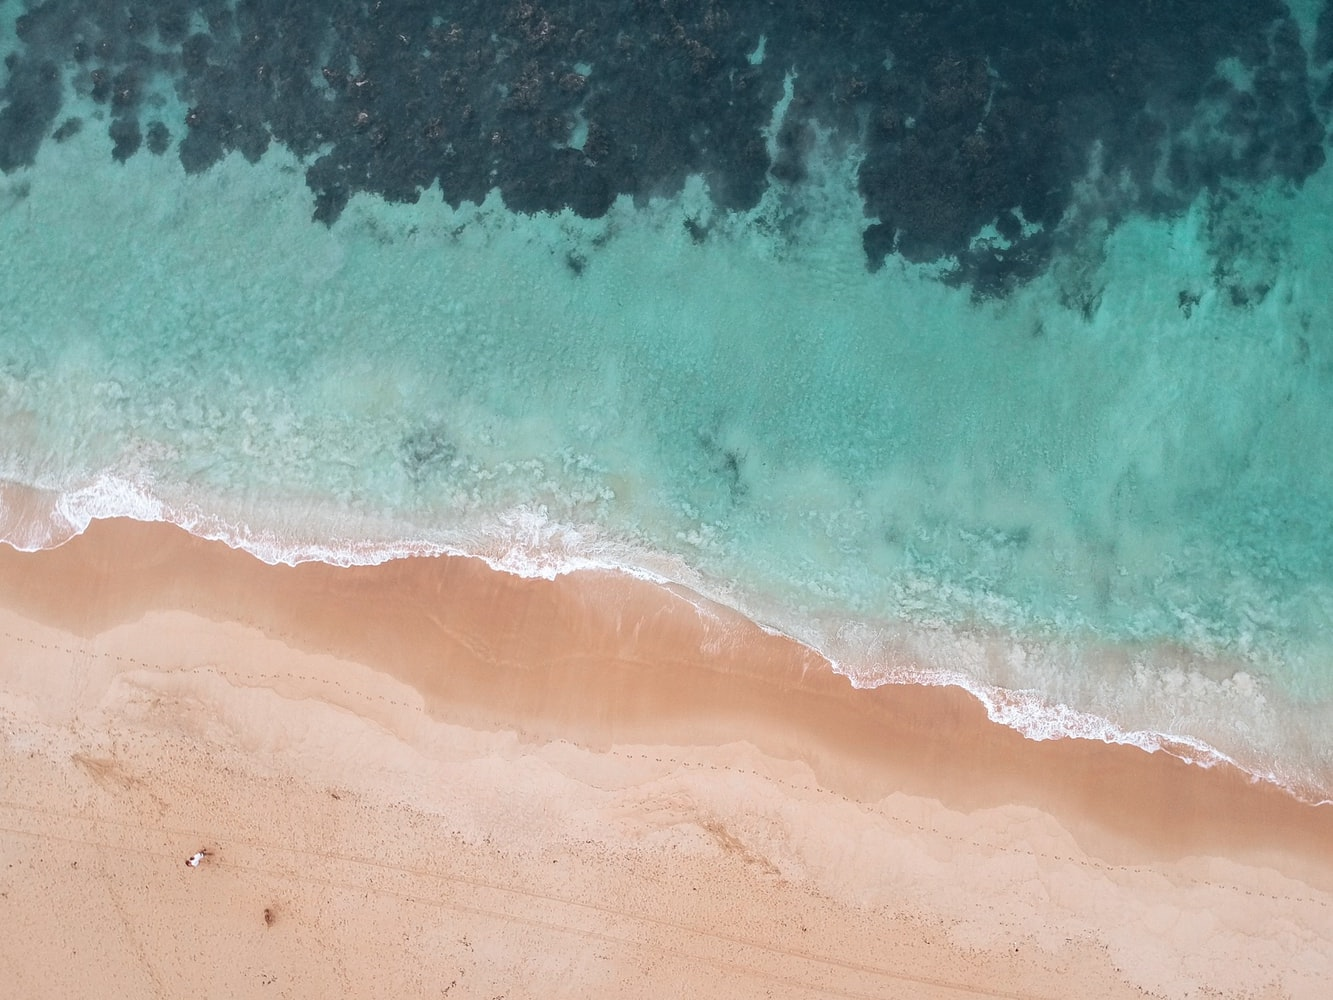

In [12]:
component = pn.Row(
    pn.Column(no_button,css_classes=['container'],width=100,height=295,margin=(0,10)),
    pn.Column(text,jpg_panel,css_classes=['container'],margin=(0,5),align='center',sizing_mode='fixed'),
    pn.Column(yes_button,css_classes=['container'],width=100,height=295,margin=(0,10)),
    css_classes=['container'],
    width=655,
    height=300,
    align='center'
    )


component

Row
    [0] Button(button_type='success', name='YES', width=50)
    [1] Button(button_type='danger', name='NO', width=50)
    [2] StaticText()
    [3] JPG(str, height=250, sizing_mode='fixed', width=250)
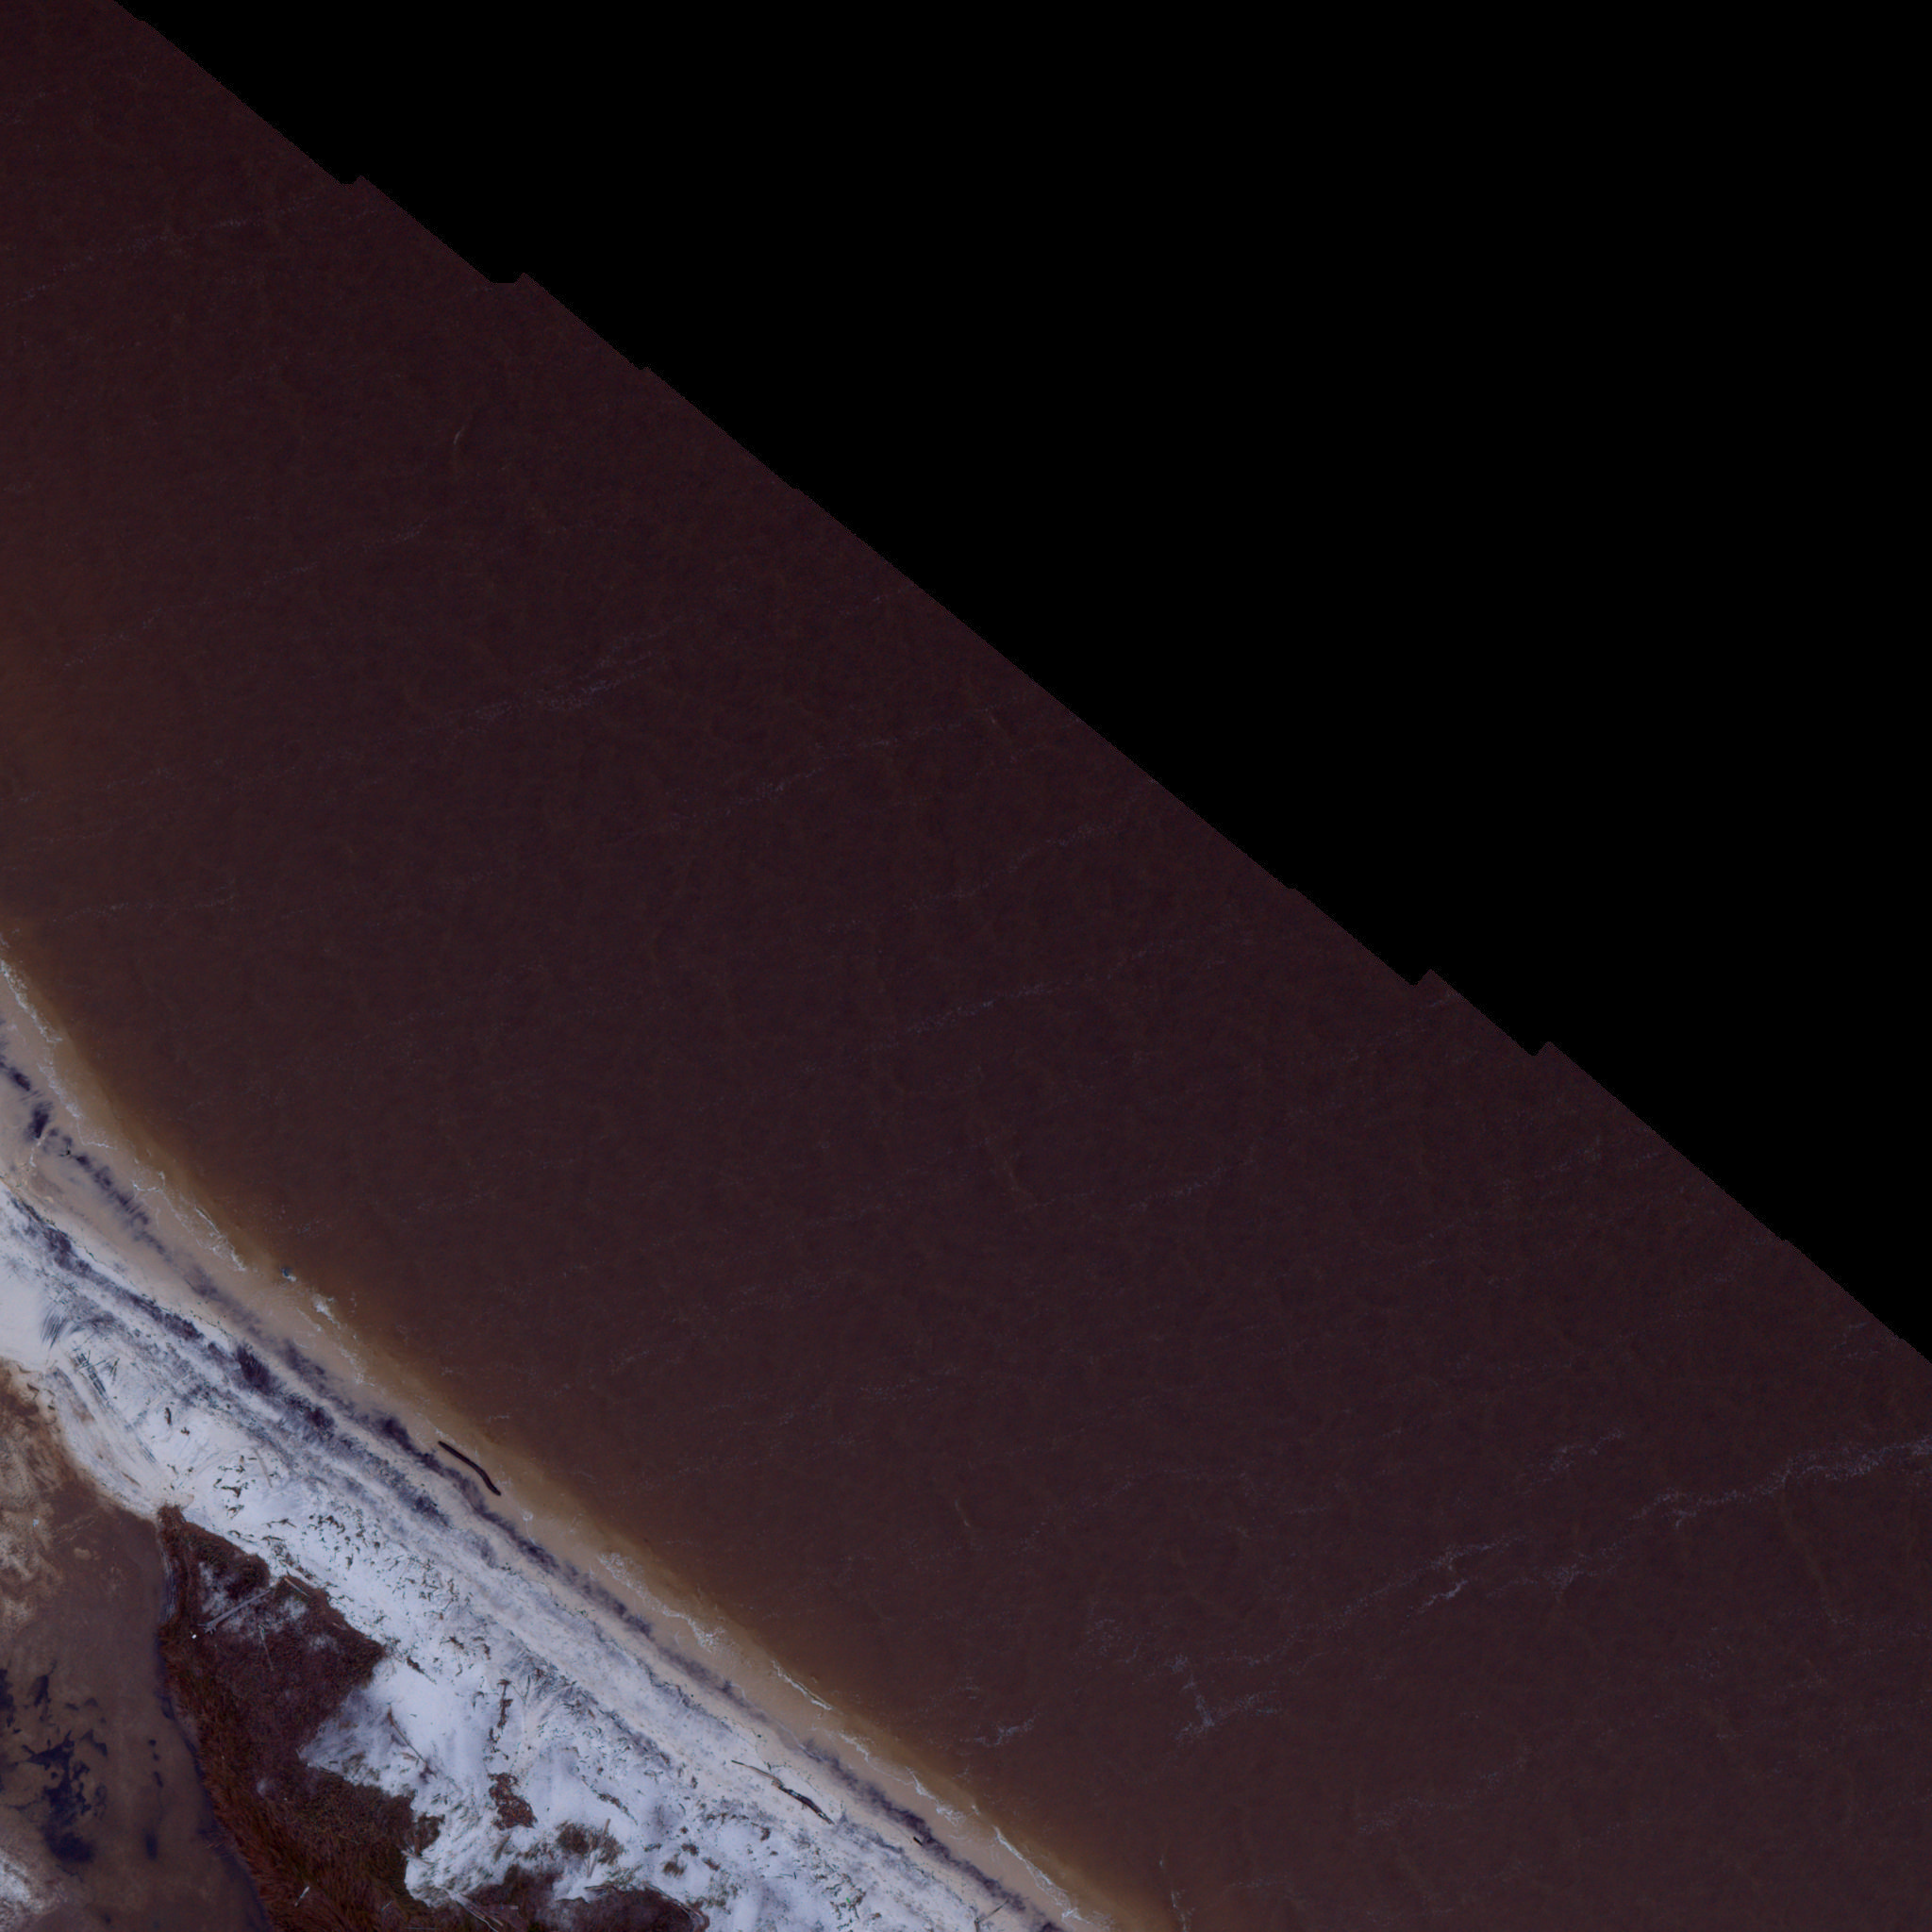

In [74]:
import shutil
import panel as pn
import param
import asyncio
import os
import asyncio
pn.extension()

def copy_image(photo_loc:str, ext:str):
        """COPY photo_loc to the sorted_images directory with the ext appended to the filename"""
        
        # Check if the sorted dir exists if it doesn't create it
        sorted_images_path=os.getcwd()+os.sep+"sorted_images"
        if not os.path.isdir(sorted_images_path):
            os.mkdir(sorted_images_path)

        # Change the filename of the photo_loc
        new_filename=change_filename(os.path.basename(photo_loc),ext,sorted_images_path)

        # Move the image from images into sorted_images
        shutil.copyfile(photo_loc, new_filename)
    
def change_filename(old_filename:str, ext:str, photos_dir:str):
        """Appends ext to the end of the filename. Returns the location of the file in the location with photos_dir"""
        new_filename=os.path.splitext(old_filename)
        new_filename=new_filename[0]+"_"+str(ext)+new_filename[1]
        new_photo_loc=photos_dir+os.sep+new_filename
        return new_photo_loc

            

async def test(index,ext):
    print("GOTTA WAIT")
    photos_dir_location=os.getcwd()+os.sep+"images"
    photos_list=os.listdir(photos_dir_location)
    photo_loc=photos_dir_location+os.sep+photos_list[index]
    copy_image(photo_loc,ext)
    await asyncio.sleep(0.5)
    print("GOT IT DONE")


# Class to hold parameters
class BaseClass(param.Parameterized):
    num_int                 = param.Integer(0, bounds=(0, 10)) 

base = BaseClass()
base.num_int=0

# Variables for images
photos_dir_location=os.getcwd()+os.sep + "images"
photos_list=os.listdir(photos_dir_location)
inital_photo=photos_dir_location+os.sep+photos_list[0]

# Widgets
jpg_panel=pn.pane.JPG(inital_photo, width=250, height=250,sizing_mode='fixed')
yes_button = pn.widgets.Button(name='YES',width=50,button_type='success')
no_button = pn.widgets.Button(name='NO',width=50,button_type='danger')
text = pn.widgets.StaticText()

def quality_control(photos_dir_location,photos_list):
    """Helper function to check if the photos_dir_location exists and that it contains jpgs. Returns false if either check fails"""
    if not os.path.isdir(photos_dir_location):
            os.mkdir(photos_dir_location)
            text.value=f"ERROR: There are no images in\n{photos_dir_location}"
            yes_button.disabled=True
            no_button.disabled=True
            return False
    if len(photos_list)==0:
            text.value=f"ERROR: There are no jpgs in\n{photos_dir_location}"
            yes_button.disabled=True
            no_button.disabled=True
            return False
#         If neither of these return false it means quality control passed
    return True


async def run_async(event):
    if (event.obj.name == "YES"):
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Running YES {base.num_int}'
            await test(base.num_int,"good")
            base.num_int+=1
            new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
            # Update the jpg_panel with the new image
            jpg_panel.object=new_photo
            text.value = f'Finished YES {base.num_int}'
            yes_button.disabled=False
            no_button.disabled=False
    else:
        quality_control_passed=quality_control(photos_dir_location,photos_list)
        if quality_control_passed:
            yes_button.disabled=True
            no_button.disabled=True
            text.value = f'Running NO {base.num_int}'
            await test(base.num_int,"bad")
            base.num_int+=1
            new_photo=photos_dir_location+os.sep+photos_list[base.num_int]
            jpg_panel.object=new_photo
            text.value = f'Finished NO {base.num_int}'
            yes_button.disabled=False
            no_button.disabled=False

yes_button.on_click(run_async)
no_button.on_click(run_async) 

pn.Row(yes_button,no_button,text,jpg_panel)